In [ ]:
!pwd

/content


In [ ]:
cd/content/drive/My Drive/CT-ORG-GZ


/content/drive/My Drive/CT-ORG-GZ


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time 
from sklearn.metrics import confusion_matrix
import numpy as np 
from numpy.random import default_rng 

In [ ]:
volfile = 'vol32np4.npy'
labelfile = 'train_test_labels_fln.npy'
test_train_images = np.load(volfile)
c = np.load(labelfile)
train_test_labels = np.reshape(c, (-1, 1))
x = 80
n = train_test_labels.shape[0]
nv1 = (i for i in range(n))
nv =  np.fromiter(nv1, np.int)
nt = (x/100)*n
ntr = int(nt) 
ntt = n-ntr
rng = default_rng()
tri = rng.choice(n, size=ntr, replace=False)
tti = np.setdiff1d(nv,tri) 
train_images = test_train_images [tri,:,:,:]
train_labels = train_test_labels [tri,:]
test_images = test_train_images[tti,:,:,:]
test_labels = train_test_labels [tti,:]

In [ ]:
print()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_18"
_________________________________________________________________
Layer (type)              

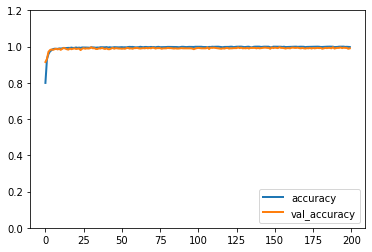

In [ ]:
# CNN MODEL

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=200, validation_split=0.1,
                    validation_data=(train_images, train_labels))


plt.ylim(0, 1.2)
plt.plot(history.history['accuracy'], label='accuracy', lw=2)
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', lw=2)
a1 = history.history['accuracy']
b1 = np.asarray(a1)

a2 = history.history['val_accuracy']
b2 = np.asarray(a2)
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)


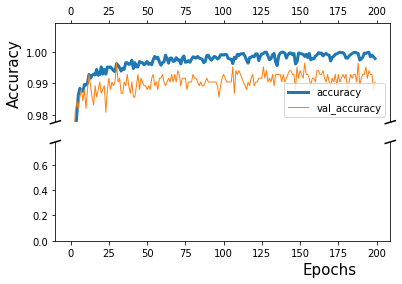

In [ ]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes

ax.plot(history.history['accuracy'],label='accuracy', lw=3)
ax.plot(history.history['val_accuracy'],'-', label='val_accuracy', lw=1)

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
# zoom-in / limit the view to different portions of the data
ax.set_ylim(0.9777, 1.009)  # outliers only
ax2.set_ylim(0, 0.779)  # most of the data
ax2.set_xlabel('Epochs', fontsize = 15, horizontalalignment='right',  x= 0.9)
ax.set_ylabel('Accuracy', fontsize = 15)
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax.legend(loc = 'lower right')
d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)       
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  
kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 
plt.show()

In [ ]:
def Breaky (pts):
  b1 = 0.9
  b2 = 2


  


  f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

  ax.plot(pts)
  ax2.plot(pts)

  ax.set_ylim(b1-0.02, b2)  
  ax2.set_ylim(0, .8) 

  ax.spines['bottom'].set_visible(False)
  ax2.spines['top'].set_visible(False)
  ax.xaxis.tick_top()
  ax.tick_params(labeltop='off')  
  ax2.xaxis.tick_bottom()


  d = .015 
  kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
  ax.plot((-d, +d), (-d, +d), **kwargs)       
  ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

  kwargs.update(transform=ax2.transAxes) 
  ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
  ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

  plt.show()

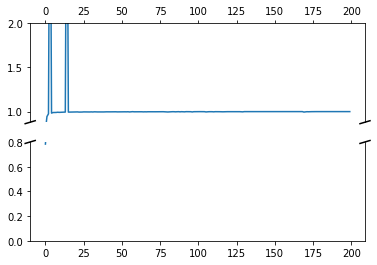

In [ ]:
Breaky(b1)


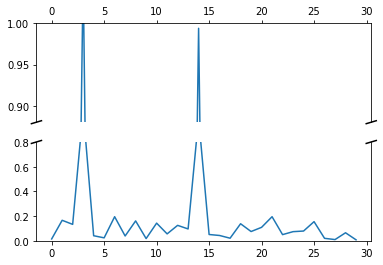

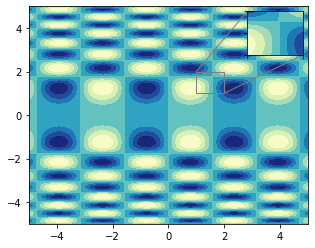

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(5,4))
extent = (0, 100, 0, 50)
x, y = np.mgrid[-5:5:100j, -5:5:100j]
z = np.sin(2*x)*np.sin(y**2)
ax.contourf(x, y, z, cmap="YlGnBu_r")

axins = zoomed_inset_axes(ax, 2, loc=1)

axins.contourf(x, y, z, cmap="YlGnBu_r")

axins.set_xlim(1, 2)
axins.set_ylim(1, 2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()

plt.show()

In [ ]:
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
x1 = .4752
y1 = .8100
x2 = .8194
y2 = .9258
x3 = .1268
y3 = .9499
s1 = (y2-y1)/(x2-x1)
s2 = (y3-y2)/(x3-x2)
print(s1, s2)

0.33643230679837277 -0.03479641928963328
